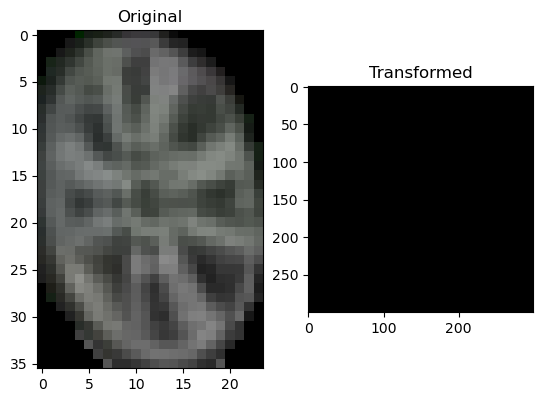

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def read_image_with_chinese_path(image_path):
    """
    读取含有中文路径的图片
    """
    try:
        with open(image_path, 'rb') as f:
            img_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
            img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)
            return img
    except Exception as e:
        return None


# 读取图片，这里假设图片路径包含中文，使用上面的函数读取
image_path = '轮毂001B1.png'  # 请替换为你的实际完整路径，若和代码同目录可不写路径只写文件名
image = read_image_with_chinese_path(image_path)

if image is None:
    print("无法读取该图片，请检查路径或图片是否损坏")
    exit()

# 定义侧视图中的四个点（按照左上、右上、右下、左下的顺序）
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])

# 定义正视图中对应的四个点
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

# 计算透视变换矩阵
M = cv2.getPerspectiveTransform(pts1, pts2)

# 进行透视变换
dst = cv2.warpPerspective(image, M, (300, 300))

# 可视化结果
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Transformed')
plt.show()